In [1]:
import os
from PIL import Image
import numpy as np

# Function to load and convert images to NumPy arrays
def load_images(folder_path, target_size=(28, 28)):
    images = []
    labels = []
    try:
        for label, character in enumerate(os.listdir(folder_path)):
            character_path = os.path.join(folder_path, character)
            if os.path.isdir(character_path):
                print(f"Loading images for character: {character}")
                for filename in os.listdir(character_path):
                    img_path = os.path.join(character_path, filename)
                    try:
                        # Open image using Pillow
                        img = Image.open(img_path)
                        # Resize image
                        img = img.resize(target_size)
                        # Convert image to grayscale and then to numpy array
                        img_array = np.array(img.convert('L'))  # 'L' mode converts to grayscale
                        images.append(img_array)
                        labels.append(label)
                    except Exception as e:
                        print(f"Error loading image {img_path}: {e}")
    except Exception as e:
        print(f"Error accessing directory {folder_path}: {e}")
    
    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    # Reshape images to have a channel dimension
    images = np.expand_dims(images, axis=-1)
    
    # Convert labels to one-hot encoding
    num_classes = len(np.unique(labels))
    one_hot_labels = np.zeros((len(labels), num_classes))
    one_hot_labels[np.arange(len(labels)), labels] = 1
    
    return images, one_hot_labels

# Directory containing images for each character
characters_dir =r'C:\Users\hrith\OneDrive\Desktop\Project Manas\Neural Network\trainNN\train'

# Load images and labels
try:
    X_train, y_train = load_images(characters_dir)
except Exception as e:
    print(f"Error loading images: {e}")
    X_train, y_train = None, None

# Check if images were loaded successfully
if X_train is not None and y_train is not None:
    print(f"Number of images loaded: {len(X_train)}")



Loading images for character: bart_simpson
Loading images for character: charles_montgomery_burns
Loading images for character: homer_simpson
Loading images for character: krusty_the_clown
Loading images for character: lisa_simpson
Loading images for character: marge_simpson
Loading images for character: milhouse_van_houten
Loading images for character: moe_szyslak
Loading images for character: ned_flanders
Loading images for character: principal_skinner
Number of images loaded: 8000


In [2]:

# Directory containing images for each character
characters_dir1 =r'C:\Users\hrith\OneDrive\Desktop\Project Manas\Neural Network\testNN\test'

# Load images and labels
try:
    X_test, y_test = load_images(characters_dir1)
except Exception as e:
    print(f"Error loading images: {e}")
    X_train, y_train = None, None

# Check if images were loaded successfully
if X_test is not None and y_test is not None:
    print(f"Number of images loaded: {len(X_test)}")




Loading images for character: bart_simpson
Loading images for character: charles_montgomery_burns
Loading images for character: homer_simpson
Loading images for character: krusty_the_clown
Loading images for character: lisa_simpson
Loading images for character: marge_simpson
Loading images for character: milhouse_van_houten
Loading images for character: moe_szyslak
Loading images for character: ned_flanders
Loading images for character: principal_skinner
Number of images loaded: 2000


In [63]:
# Directory containing images for each character
characters_dir2 =r'C:\Users\hrith\OneDrive\Desktop\Project Manas\Neural Network\test1\test'

# Load images and labels
try:
    X_test1, y_test1 = load_images(characters_dir2)
except Exception as e:
    print(f"Error loading images: {e}")
    X_test1, y_test1 = None, None

# Check if images were loaded successfully
if X_test1 is not None and y_test1 is not None:
    print(f"Number of images loaded: {len(X_test1)}")


Error loading images: arrays used as indices must be of integer (or boolean) type


In [15]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)
    
    def forward(self, X):
        self.hidden_output = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_input_hidden)
        self.output = self.softmax(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output)
        return self.output
    
    def backward(self, X, y):
        batch_size = X.shape[0]
        
        # Compute gradients for output layer
        delta_output = self.output - y
        d_weights_hidden_output = np.dot(self.hidden_output.T, delta_output) / batch_size
        d_bias_hidden_output = np.sum(delta_output, axis=0, keepdims=True) / batch_size
        
        # Compute gradients for hidden layer
        delta_hidden = np.dot(delta_output, self.weights_hidden_output.T) * self.sigmoid_derivative(self.hidden_output)
        d_weights_input_hidden = np.dot(X.T, delta_hidden) / batch_size
        d_bias_input_hidden = np.sum(delta_hidden, axis=0, keepdims=True) / batch_size
        
        # Update weights and biases
        self.weights_input_hidden -= self.learning_rate * d_weights_input_hidden
        self.bias_input_hidden -= self.learning_rate * d_bias_input_hidden
        self.weights_hidden_output -= self.learning_rate * d_weights_hidden_output
        self.bias_hidden_output -= self.learning_rate * d_bias_hidden_output

        
    def train(self, X, y, epochs):
        losses = []  # List to store the loss values
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Backward pass
            self.backward(X, y)
            
            # Compute loss
            loss = self.loss(y, output)
            losses.append(loss)  # Append the loss value to the list
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')
        # Plot the loss curve
        plt.plot(range(epochs), losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss Curve')
        plt.show()
                
    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)
    
    def loss(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))


Epoch 0, Loss: 6.84739342031602
Epoch 100, Loss: 2.302585092994045
Epoch 200, Loss: 2.3025850929940463
Epoch 300, Loss: 2.3025850929940463
Epoch 400, Loss: 2.302585092994045
Epoch 500, Loss: 2.302585092994045
Epoch 600, Loss: 2.302585092994045
Epoch 700, Loss: 2.3025850929940463
Epoch 800, Loss: 2.302585092994045
Epoch 900, Loss: 2.3025850929940463


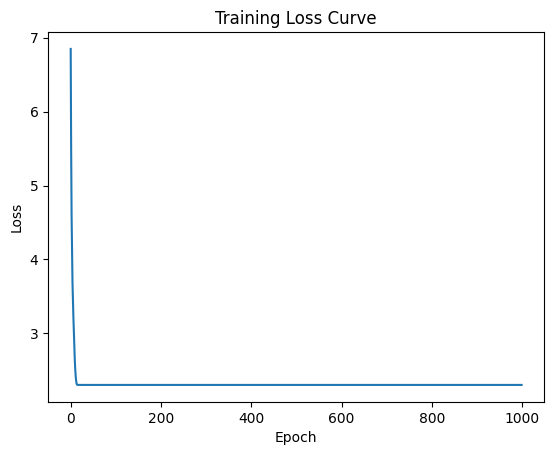

Accuracy: 0.1


In [60]:


#Normalize input features
X_train = X_train / 255.0
X_test = X_test / 255.0

# Shuffle the data
shuffle_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffle_indices]
y_train = y_train[shuffle_indices]

# Initialize neural network parameters
input_size = X_train.shape[1] * X_train.shape[2]  # Assuming images are 28x28
hidden_size = 260
output_size = y_train.shape[1]
learning_rate = 0.1
epochs = 1000


X_train_reshaped = X_train.reshape(len(X_train), -1)
# Initialize and train the neural network
model = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model.train(X_train_reshaped, y_train, epochs)

X_test_reshaped = X_test.reshape(len(X_test), -1)
# Make predictions
predictions = model.predict(X_test_reshaped)


# Calculate accuracy
# Convert y_test from one-hot encoded to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(predictions == y_test_labels)
print(f'Accuracy: {accuracy}')